# Training a Model on Encrypted Data

In [ ]:
!pip install crypten

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.9/259.9 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=15ec4d45a761cddad94e5442065f92baf552f41fd984c4cda9df8512036d33ab
  Stored in directory: /root/.cache/pip/wheels/b1/a3/c2/6df046c09459b73cc9bb6c4401b0be6c47048baf9a1617c485
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=0e74b07ecee1eb90526209bad6e5014e48d88

In [ ]:
!git clone https://github.com/facebookresearch/CrypTen

Cloning into 'CrypTen'...
remote: Enumerating objects: 3178, done.
remote: Counting objects: 100% (1041/1041), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 3178 (delta 950), reused 899 (delta 888), pack-reused 2137
Receiving objects: 100% (3178/3178), 14.21 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (2285/2285), done.


In [ ]:
import sys
import torch
import torchvision
import matplotlib.pyplot as plt


#python 3.7 is required
#assert sys.version_info[0] == 3 and sys.version_info[1] == 7, "python 3.7 is required"

import crypten
crypten.init()

%matplotlib inline

## MNIST

In [ ]:
digits = torchvision.datasets.MNIST(root='/tmp/data',train=True,transform=torchvision.transforms.ToTensor(),
                                    download=True)

digits_test = torchvision.datasets.MNIST(root='/tmp/data',train=True,transform=torchvision.transforms.ToTensor(),
                                    download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /tmp/data/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /tmp/data/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /tmp/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /tmp/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/data/MNIST/raw



label for image is  5


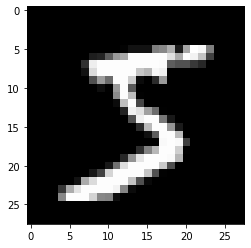

In [ ]:
plt.imshow(digits[0][0][0], cmap='gray', interpolation='none')
print("label for image is ",digits[0][1])

## Preprocess Into Tensors

In [ ]:
def take_samples(digits, n_samples=1000):
    """Returns images and labels based on sample size"""
    images, labels = [], []

    for i, digit in enumerate(digits):
        if i == n_samples:
            break
        # Prepare samples
        image, label = digit
        images.append(image)
        label_one_hot = torch.nn.functional.one_hot(torch.tensor(label),10)
        labels.append(label_one_hot)
    images = torch.cat(images)
    labels = torch.stack(labels)
    return images, labels


In [ ]:
# Prepare training samples using take_samples()
images, labels = take_samples(digits,n_samples=1000)

In [ ]:
# Prepare testing samples using take_samples()
images_test, labels_test = take_samples(digits_test,n_samples=100)

In [ ]:
# Please encrypt the images and labels using crypten.cryptensor() function
images_enc = crypten.cryptensor(images)
labels_enc = crypten.cryptensor(labels)

In [ ]:
images_enc[0]

MPCTensor(
	_tensor=tensor([[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
     

In [ ]:
# prepare encrypt testing samples
images_test_enc = crypten.cryptensor(images_test)
labels_test_enc = crypten.cryptensor(labels_test)

## Logistic Regression Model

(multiclass logistic regression)

In [ ]:
class LogisticRegression(crypten.nn.Module):

    def __init__(self):
        super().__init__()
        # images are 28x28 pixels
        self.linear1 = crypten.nn.Linear(28 * 28, 100)
        # change model
        self.linear2 = crypten.nn.Linear(100,10)

    def forward(self, x):
        x=self.linear1(x)
        return self.linear2(x)



In [ ]:
model = LogisticRegression().encrypt()

In [ ]:
model(images_enc.reshape(-1,784))

MPCTensor(
	_tensor=tensor([[  4318,   2241,   -520,  ...,  -7715,   3612,  -9097],
        [ -6616,   4534,  -1417,  ...,   6136,  -7211,  -7271],
        [ -1566,   3805,  -5744,  ...,  -4701,  -3783, -11780],
        ...,
        [   584,  -2536,  -2055,  ...,  -2107,   -691,  -8080],
        [ -2713,   9981,    632,  ...,  -1630,   5794,  -3642],
        [  6399,   9638,  -7435,  ...,  -7209,   2926, -14868]])
	plain_text=HIDDEN
	ptype=ptype.arithmetic
)

### Train Model on Encrypted Images

In [ ]:
def train_model(model, X, y, epochs=10, learning_rate=0.05):
    criterion = crypten.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.zero_grad()
        # calculate the loss
        output = model(X)
        loss = criterion(output,y)

        print(f"epoch {epoch} loss: {loss.get_plain_text()}")
        loss.backward()
        model.update_parameters(learning_rate)
    return model

In [ ]:
model = train_model(model, images_enc.reshape(-1,784), labels_enc,epochs=100, learning_rate=0.05)

epoch 0 loss: 2.327789306640625
epoch 1 loss: 2.3101043701171875
epoch 2 loss: 2.2926483154296875
epoch 3 loss: 2.2755126953125
epoch 4 loss: 2.2585906982421875
epoch 5 loss: 2.2417755126953125
epoch 6 loss: 2.225189208984375
epoch 7 loss: 2.2085113525390625
epoch 8 loss: 2.192047119140625
epoch 9 loss: 2.175506591796875
epoch 10 loss: 2.15899658203125
epoch 11 loss: 2.1426239013671875
epoch 12 loss: 2.1260833740234375
epoch 13 loss: 2.1096038818359375
epoch 14 loss: 2.0930633544921875
epoch 15 loss: 2.0763702392578125
epoch 16 loss: 2.059661865234375
epoch 17 loss: 2.04296875
epoch 18 loss: 2.0261077880859375
epoch 19 loss: 2.00921630859375
epoch 20 loss: 1.992156982421875
epoch 21 loss: 1.9750823974609375
epoch 22 loss: 1.9579925537109375
epoch 23 loss: 1.94073486328125
epoch 24 loss: 1.9233551025390625
epoch 25 loss: 1.9058685302734375
epoch 26 loss: 1.8883514404296875
epoch 27 loss: 1.87066650390625
epoch 28 loss: 1.8529815673828125
epoch 29 loss: 1.835235595703125
epoch 30 loss: 1

### Decrypt Prediction

In [ ]:
prediction = model(images_enc[2].reshape(-1,784).unsqueeze(0))

In [ ]:
prediction.get_plain_text().argmax()

tensor(4)

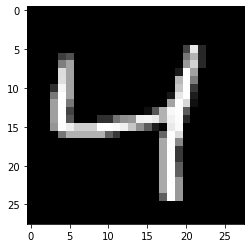

In [ ]:
plt.imshow(images[2], cmap='gray', interpolation='none')

### Test Model Accuracy

In [ ]:
def avg_test_accuracy(model, X, y):
    # calculate predicted labels and then calculate the accuracy with the groundtruth ones.
    prediction.get_plain_text
    avg_test_accuracy
    correct = (predicted == labels).sum().float()
    return float(correct / y.shape[0])

In [ ]:
avg_test_accuracy(...)

0.8899999856948853

# Try different the number of samples